In [256]:
# Import libraries

import pandas as pd
import numpy as np
import math 
import rbo
import scipy.stats as stats
import sys
import seaborn as sns



import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from scipy.stats import spearmanr


In [ ]:
# Read the data, I give some format and the name for each column

df1 = pd.read_csv('/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/6. TREC CAsT 2022 - MI runfiles/baseline_prf_mi.trec', sep=' ', names=["qID", "Q0", "docID", "rank", "score", "tag"])
df2 = pd.read_csv('/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/6. TREC CAsT 2022 - MI runfiles/baseline_prf.trec', sep=' ', names=["qID", "Q0", "docID", "rank", "score", "tag"])


df1


In [ ]:
# export doc in csv file to better see the index for next queries 

df1.to_csv('/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/6. TREC CAsT 2022 - MI runfiles/df1.csv')

df2.to_csv('/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/6. TREC CAsT 2022 - MI runfiles/df2.csv')

In [223]:
# Transforming the column docID into List for analysis 

M = df1['docID'].tolist()

N = df2['docID'].tolist()



['MARCO_33_1621342262-1',
 'MARCO_30_1605964568-1',
 'MARCO_27_1574256585-1',
 'MARCO_33_1621342262-3',
 'MARCO_57_1276848320-4',
 'MARCO_30_1605964568-5',
 'MARCO_16_3117875026-1',
 'MARCO_30_1605964568-8',
 'MARCO_04_643170393-2',
 'MARCO_33_1621342262-2',
 'MARCO_55_296706312-8',
 'MARCO_19_203198818-23',
 'MARCO_30_1605964568-6',
 'MARCO_55_296706312-6',
 'MARCO_30_1605964568-2',
 'MARCO_19_203198818-32',
 'MARCO_30_1605964568-4',
 'MARCO_16_3117875026-7',
 'MARCO_36_998866032-5',
 'MARCO_16_3117875026-6',
 'MARCO_30_1666412630-2',
 'MARCO_06_763073632-54',
 'MARCO_04_643170393-1',
 'WAPO_7X7AWMCHIQI6VENLZZBZVJOHYE-1',
 'MARCO_17_1512488010-120',
 'WAPO_FBQWHIW525C7PEKQV4B3WXZ42M-35',
 'MARCO_06_763073632-16',
 'KILT_2403081-1',
 'KILT_68736-46',
 'MARCO_01_1746584207-1',
 'KILT_14345195-2',
 'MARCO_17_1512488010-57',
 'MARCO_16_3117875026-5',
 'KILT_14345195-1',
 'KILT_46838289-2',
 'WAPO_6dfdfece-7d41-11e3-93c1-0e888170b723-1',
 'KILT_40995204-6',
 'KILT_33144243-1',
 'KILT_33140

## CORRELATION ANALYSIS (RBO)

### Kendall Tau correlation 

In [264]:
# Kendall tau--> It is possible to apply the Kendall Tau? I have to check if this list have the same element (are conjoint). If not, I can't apply kendall

# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html
# https://towardsdatascience.com/rbo-v-s-kendall-tau-to-compare-ranked-lists-of-items-8776c5182899
# Negative point: It is unweighted i.e., it places as much emphasis on the disagreement at the bottom of the list as much as the top (in popular search engines, the results in the “head” matter a lot more than the results in the “tail”)

# Here I'm selecting the documents of the firts query of both file. The query id is 132_1-1


qid = "132_1-1"
subset1 = df1[df1['qID'] == qid]
subset2 = df2[df2['qID'] == qid]
S = subset1.docID.values
T = subset2.docID.values

sorted(S) == sorted(T)

subset1

# As the result is False, I can't. 

,qID,Q0,docID,rank,score,tag
0,132_1-1,132_1-7,MARCO_33_1621342262-1,1,95.406503,BM25
1,132_1-1,132_1-7,MARCO_30_1605964568-1,2,93.955360,BM25
2,132_1-1,132_1-7,MARCO_27_1574256585-1,3,91.298071,BM25
3,132_1-1,132_1-7,MARCO_33_1621342262-3,4,86.855988,BM25
4,132_1-1,132_1-7,MARCO_04_643170393-2,5,86.795627,BM25
5,132_1-1,132_1-7,MARCO_06_1532160688-6,6,83.377761,BM25
6,132_1-1,132_1-7,MARCO_30_1605964568-8,7,81.240951,BM25
7,132_1-1,132_1-7,MARCO_30_1605964568-6,8,74.932024,BM25
8,132_1-1,132_1-7,MARCO_30_1605964568-5,9,74.665050,BM25
9,132_1-1,132_1-7,MARCO_30_1605964568-2,10,73.456024,BM25


### Rank Biased Overlap (RBO)

In [174]:
# https://towardsdatascience.com/how-to-objectively-compare-two-ranked-lists-in-python-b3d74e236f6a


def rbo(S,T, p= 0.9):
    """ Takes two lists S and T of any lengths and gives out the RBO Score
    Parameters
    ----------
    S, T : Lists (str, integers)
    p : Weight parameter
    
    Returns
    -------
    Float of RBO score
    """
    
    # Fixed Terms
    k = max(len(S), len(T))
    x_k = len(set(S).intersection(set(T)))
    
    summation_term = 0

    # Loop for summation
    # k+1 for the loop to reach the last element (at k) in the bigger list    
    for d in range (1, k+1): 
            # Create sets from the lists
            set1 = set(S[:d]) if d < len(S) else set(S)
            set2 = set(T[:d]) if d < len(T) else set(T)
            
            # Intersection at depth d
            x_d = len(set1.intersection(set2))

            # Agreement at depth d
            a_d = x_d/d   
            
            # Summation
            summation_term = summation_term + math.pow(p, d) * a_d

    # Rank Biased Overlap - extrapolated
    rbo_ext = (x_k/k) * math.pow(p, k) + ((1-p)/p * summation_term)

    return rbo_ext

In [187]:
initial_correlation = rbo(S,T) # without using the weight
print("The RBO score means that the two lists are nearly similar in", initial_correlation)

# as the result is 0.76, there is a good correlation but there aren't the same time of document retrieved for the same query 

The RBO score means that the two lists are nearly similar in 0.7577571548087627


In [188]:
# define the weight (Wrbo) calculator function to help us choose p. 
# p for giving a weightage (Wrbo) to the top d elements under comparison
# d is the depth into the list ( if d = 5 , means first 5 documents)


def weightage_calculator(p,d):
    

    summation_term = 0

    for i in range (1, d): # taking d here will loop upto the value d-1 
        summation_term = summation_term + math.pow(p,i)/i


    Wrbo_1_d = 1 - math.pow(p, d-1) + (((1-p)/p) * d *(np.log(1/(1-p)) - summation_term))

    return Wrbo_1_d

In [199]:
# the first 5 documents are normally the most important for the user. 
# for that I give more weight p = 0.8
# the result will later be implement in the rbo (S,T,P) where now it's possible to do again the comparison between
#    both list but given more weight (importance) to the first 5 document in the list

p = 0.8
d = 5 

weightage_calculator(p,d)

# If I take the first 5 document, the result is 0.67, means that the correlation between this first 5 documents is low 
# If I take the first 10, the result will be better (0.85)
# Means, that, when I take into consideration more 



0.8608640572092918

In [202]:
# the comparison score with the weight (p)

print ("The resulting comparison score given the weight is:", rbo (S, T, p))
print("Before using the rbo without the weight, the correlation was:", initial_correlation)

# the result is 0.89. Means that are T is very similar to S

The resulting comparison score given the weight is: 0.866504865785759
Before using the rbo without the weight, the correlation was: 0.7577571548087627


In [140]:
d = {'Q1':S,'Q2':T}
new_df = pd.DataFrame(d)
new_df

,Q1,Q2
0,MARCO_33_1621342262-1,MARCO_33_1621342262-1
1,MARCO_30_1605964568-1,MARCO_30_1605964568-1
2,MARCO_27_1574256585-1,MARCO_27_1574256585-1
3,MARCO_33_1621342262-3,MARCO_33_1621342262-3
4,MARCO_04_643170393-2,MARCO_57_1276848320-4
5,MARCO_06_1532160688-6,MARCO_30_1605964568-5
6,MARCO_30_1605964568-8,MARCO_16_3117875026-1
7,MARCO_30_1605964568-6,MARCO_30_1605964568-8
8,MARCO_30_1605964568-5,MARCO_04_643170393-2
9,MARCO_30_1605964568-2,MARCO_33_1621342262-2


In [207]:
# I want to know which and how many documents are different between the first query of both file (in this example I consider the first 10 documents).

limit = 10


c1 = Counter(S[:limit])
c2 = Counter(T[:limit])
diff = list((c1 - c2).elements())

print("No of elements that are different:", len(diff))
print(diff)



No of elements that are different: 3
['MARCO_06_1532160688-6', 'MARCO_30_1605964568-6', 'MARCO_30_1605964568-2']


### Spearman’s rank

In [258]:
# for S, I consider only the first 1000 docs because in T there are also 1000 and I must have the same amount of doc

rho, p = spearmanr(S[0:1000], T)

print(p)
print(rho)

#From the output we can see that the Spearman rank correlation is 0.066 and the corresponding p-value is 0.35.
#This indicates that there is a moderate correlation between the first query of both runfil
# However, since the p-value of the correlation is not less than 0.05, the correlation is not statistically significant.

0.0358858303357636
0.06636135036135037


## OTHER ANALYSIS WITHIN A SINGLE FILE  

### HOW MANY DOCUMENTS OF THE FIRST QUERY APPEAR IN THE SECOND, THIRD, FORTH OR FIFTH QUERY RESULT. 

In [210]:
print(df1['qID'].unique())

['132_1-1' '132_1-3' '132_1-5' '132_1-7' '132_2-1' '132_2-3' '132_2-5'
 '132_2-7' '132_2-9' '132_2-11' '132_2-13' '132_3-1' '132_3-3' '132_3-5'
 '132_3-7' '133_1-1' '133_1-3' '133_1-5' '133_1-7' '133_3-2' '133_3-4'
 '133_3-6' '133_3-8' '133_2-1' '133_2-3' '134_1-1' '134_2-1' '134_3-1'
 '134_3-3' '134_3-5' '134_4-2' '134_4-4' '134_1-3' '134_1-5' '134_1-7'
 '134_1-9' '134_1-11' '134_1-13' '134_2-3' '135_1-1' '135_1-3' '135_1-5'
 '135_1-7' '135_3-1' '135_3-3' '135_3-5' '135_2-1' '135_2-3' '135_2-5'
 '135_2-7' '135_2-9' '135_2-11' '135_4-1' '136_1-1' '136_1-3' '136_1-5'
 '136_1-7' '136_1-9' '136_1-11' '136_1-13' '136_2-1' '136_2-3' '136_2-5'
 '137_1-1' '137_1-3' '137_1-5' '137_1-7' '137_1-9' '137_1-11' '138_1-1'
 '138_1-3' '138_1-5' '138_1-7' '138_1-9' '138_1-11' '139_1-1' '139_2-1'
 '139_2-3' '139_2-5' '139_2-7' '139_2-9' '139_2-11' '139_2-13' '139_2-15'
 '139_2-17' '139_2-19' '139_1-3' '139_1-5' '139_1-7' '140_1-1' '140_1-3'
 '140_1-5' '140_1-7' '140_4-2' '140_4-4' '140_4-6' '140_4-8' '1

In [233]:
# I will consider all the doc of the first run file (df1.csv). 
# I will consider each query as a part of the conversational search process, it means that the second query will be more specific than the first one and so on for the next queries
# https://stackoverflow.com/questions/13323851/python-3-counting-matches-in-two-lists-including-duplicates

firstQuery = df1[df1['qID'] == "132_2-1"]
secondQuery = df1[df1['qID'] == "132_2-3"]
thirdQuery = df1[df1['qID'] == "132_2-5"]
fourthQuery = df1[df1['qID'] == "132_2-7"]
fifthQuery = df1[df1['qID'] == "132_2-9"]

documentsFirstQuery = firstQuery['docID'].tolist()
documentsSecondQuery = secondQuery['docID'].tolist()
documentsThirdQuery = thirdQuery['docID'].tolist()
documentsFourthQuery = fourthQuery['docID'].tolist()
documentsFifthQuery = fifthQuery['docID'].tolist()

results1 = 0
results2 = 0
results3 = 0
results4 = 0

for doc in documentsFirstQuery:
        results1 += documentsSecondQuery.count(doc)
        results2 += documentsThirdQuery.count(doc)
        results3 += documentsFourthQuery.count(doc)
        results4 += documentsFifthQuery.count(doc)


print("How many doc of the first query are in the second query:", results1)
print("How many doc of the first query are in the third query:",results2)
print("How many doc of the first query are in the fourth query:",results3)
print("How many doc of the first query are in the fifth query:",results4)

# in this case, you can see the trend of how many unique documents there are between the first query and the following queries. It can be seen that there is a trend towards a decrease of equal documents each time a new query is written. 


How many doc of the first query are in the second query: 1188
How many doc of the first query are in the third query: 1062
How many doc of the first query are in the fourth query: 482
How many doc of the first query are in the fifth query: 622


In [242]:
# Now, considering only the first 10 result for each query, normally are the most important, how many same documents there are between each query?)

limit = 10

documentsFirstQuery = documentsFirstQuery[0:limit]
documentsSecondQuery = documentsSecondQuery[0:limit]
documentsThirdQuery = documentsThirdQuery[0:limit]
documentsFourthQuery = documentsFourthQuery[0:limit]
documentsFifthQuery = documentsFifthQuery[0:limit]


results1 = 0
results2 = 0
results3 = 0
results4 = 0

for doc in documentsFirstQuery:
        results1 += documentsSecondQuery.count(doc)
        results2 += documentsThirdQuery.count(doc)
        results3 += documentsFourthQuery.count(doc)
        results4 += documentsFifthQuery.count(doc)

print("How many doc of the first query are in the first 10 result of the second query:", results1)
print("How many doc of the first query are in the first 10 result of the second third query:",results2)
print("How many doc of the first query are in the first 10 result of the second fourth query:",results3)
print("How many doc of the first query are in the first 10 result of the second fifth query:",results4)

# you can see how in reality, without considering the total of the results for the topic that is handled, 
# and we only concentrate on the first 10 links (documents) that the search engine gives us, we can see that 
# the first query is NOT EFFECTIVE to find the most exact information that the user needs. 


How many doc of the first query are in the first 10 result of the second query: 0
How many doc of the first query are in the first 10 result of the second third query: 0
How many doc of the first query are in the first 10 result of the second fourth query: 0
How many doc of the first query are in the first 10 result of the second fifth query: 1


In [240]:
firstQuery.head()

,qID,Q0,docID,rank,score,tag
6000,132_2-1,132_2-13,MARCO_30_1605964568-1,1,91.613937,BM25
6001,132_2-1,132_2-13,MARCO_33_1621342262-1,2,90.977811,BM25
6002,132_2-1,132_2-13,MARCO_16_3117875026-1,3,86.452492,BM25
6003,132_2-1,132_2-13,MARCO_27_1574256585-1,4,83.776309,BM25
6004,132_2-1,132_2-13,MARCO_48_1471185837-12,5,83.167774,BM25


### TO ANALYSE THE EFFECTIVENESS OF THE FIRST QUESTION WITH RESPECT TO THE LAST ONE IN WHICH THE USER IS SATISFIED WITH THE ANSWER GIVEN:

#### Of those documents that are still valid in the last query, how have they changed their ranking?

### HOW TO MEASURE THE PERFORMANCE OF EACH QUERY?? (IVAN)

In [ ]:
# ?????

# USING SEABORN

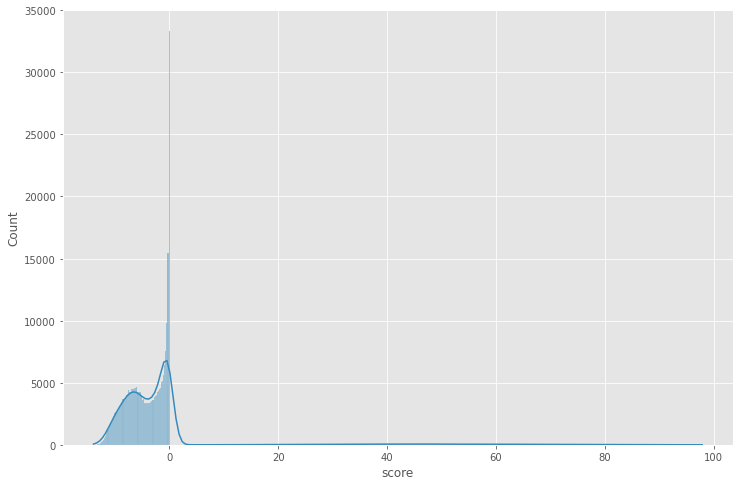

In [246]:
sns.histplot(df1.score, kde=True)
plt.show()

# There are really few high scoring documents compared to the majority that have a score lower than 0. 

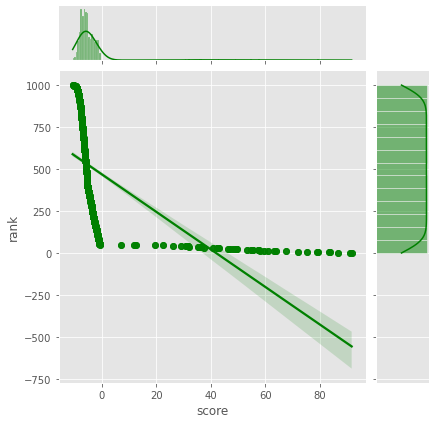

In [249]:
sns.jointplot(data=firstQuery, x='score', y='rank', kind='reg', color='g')
plt.show()